In [18]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import time
from urllib.parse import urljoin, urlparse
from urllib.request import urlopen, urlretrieve, quote, URLopener
import requests
import lxml
import os
import re
import matplotlib.pyplot as plt

In [6]:
#specify url for download:
url = 'https://www.pianostreet.com/piano_music/download_1/sheet_1.php'

In [7]:
#request url
html = requests.get(url).content
#create a list of dataframes
df_list = pd.read_html(html)
df = df_list[4]
df = df.rename(columns=df.iloc[0])
df = df.drop(df.index[0])

#loop through the remaining pages to get the rest of the table:
for i in range(1,15):
    new_url = f'https://www.pianostreet.com/piano_music/download_1/sheet_{i+1}.php'
    new_html = requests.get(new_url).content
    df_list_new = pd.read_html(new_html)
    df_new = df_list_new[4]
    df_new = df_new.rename(columns=df_new.iloc[0])
    df_new = df_new.drop(df_new.index[0])
    df_new = df_new.dropna(subset=['Level'])
    df = df.append(df_new, ignore_index = True)
    
    


In [15]:
#add more levels:
col1 =['Johann Sebastian Bach: BWV114',          
         'Johann Sebastian Bach: BWV115',        
         'Johann Sebastian Bach: BWV116',
         'Johann Sebastian Bach: BWV122',
         'Johann Sebastian Bach: BWV126',
         'Johann Sebastian Bach: BWV846_1',
         'Johann Sebastian Bach: BWV847_2',
         'Johann Sebastian Bach: BWV848_3',
         'Johann Sebastian Bach: BWV850_5',
         'Johann Sebastian Bach: BWV853_8',
         'Johann Sebastian Bach: BWV860_15',
         'Johann Sebastian Bach: BWV862_17',
         'Johann Sebastian Bach: BWV863_18',
         'Johann Sebastian Bach: BWV865_20',
         'Johann Sebastian Bach: BWV866_21',
         'Johann Sebastian Bach: BWV869_24',
         'Johann Sebastian Bach: BWV870_1',
         'Johann Sebastian Bach: BWV875_6',
         'Johann Sebastian Bach: BWV876_7',
         'Wolfgang Amadeus Mozart: K545_1 Exposition',
         'Frederic Chopin: Tarantella',
         'Frederic Chopin: Mazurka 06_2',
         'Frederic Chopin: Sonata 1',
         'Frederic Chopin: Sonata 2',
         'Frederic Chopin: Sonata 3'
        ]
col4 = [2, 2, 3, 2, 2, 8, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 5, 8, 8, 8]
col2 = ['','','','','','','','','','','','','','','','','','','','','','','','', '']
col3 = ['Piece', 'Piece','Piece','Piece','Piece','Piece','Piece','Piece','Piece','Piece','Piece','Piece','Piece',
        'Piece','Piece','Piece','Piece','Piece','Piece','Piece','Piece','Piece','Movement','Movement','Movement']
df_add = pd.DataFrame(data = {'Composer - Title': col1, 'Key': col2, 'Type': col3, 'Level': col4})
df.append(df_add, ignore_index=True)

,Composer - Title,Key,Type,Level
0,Albéniz: Aragòn,F Major,Piece,8+
1,Albéniz: Barcarolle Catalene,D-flat Major,Piece,7
2,Albéniz: La Vega,A-flat Minor,Piece,8+
3,Albéniz: Rapsodia Espagñola,NaN,Piece,8+
4,Albéniz: Tango Espagnol,A Minor,Piece,8
5,Albéniz: Zortzico,E Minor,Piece,8+
6,Albéniz: Rapsodia Cubana,G Major,Piece,8+
7,Albéniz: Sérénade Espagnole,D-flat Major,Piece,8
8,Albéniz: Mallorca (Barcarola),F-sharp Minor,Piece,8
9,Albéniz: Prelude / Asturias,G Minor,Piece,8


In [16]:
print(df.describe())
df.Level.replace(['8+'], [9], inplace=True)
df['Level'] = pd.to_numeric(df['Level'])

print(df.info)
df.to_csv('scores.csv')

         Composer - Title      Key   Type Level
count                2958     2625   2958  2958
unique               1641       28     14     9
top     Scarlatti: Sonata  C Major  Piece    8+
freq                  186      301   1656   982
<bound method DataFrame.info of                                        Composer - Title            Key  \
0                                       Albéniz: Aragòn        F Major   
1                          Albéniz: Barcarolle Catalene   D-flat Major   
2                                      Albéniz: La Vega   A-flat Minor   
3                           Albéniz: Rapsodia Espagñola            NaN   
4                               Albéniz: Tango Espagnol        A Minor   
5                                     Albéniz: Zortzico        E Minor   
6                              Albéniz: Rapsodia Cubana        G Major   
7                           Albéniz: Sérénade Espagnole   D-flat Major   
8                         Albéniz: Mallorca (Barcarola)  F-sha

Text(0.5, 0, 'Difficulty levels')

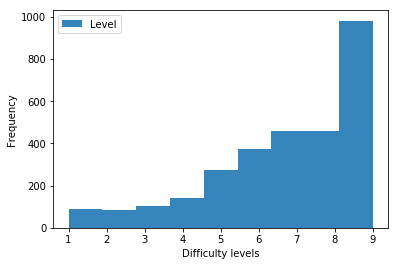

In [19]:
df.plot.hist(bins=9, alpha=0.9)
plt.xlabel('Difficulty levels')